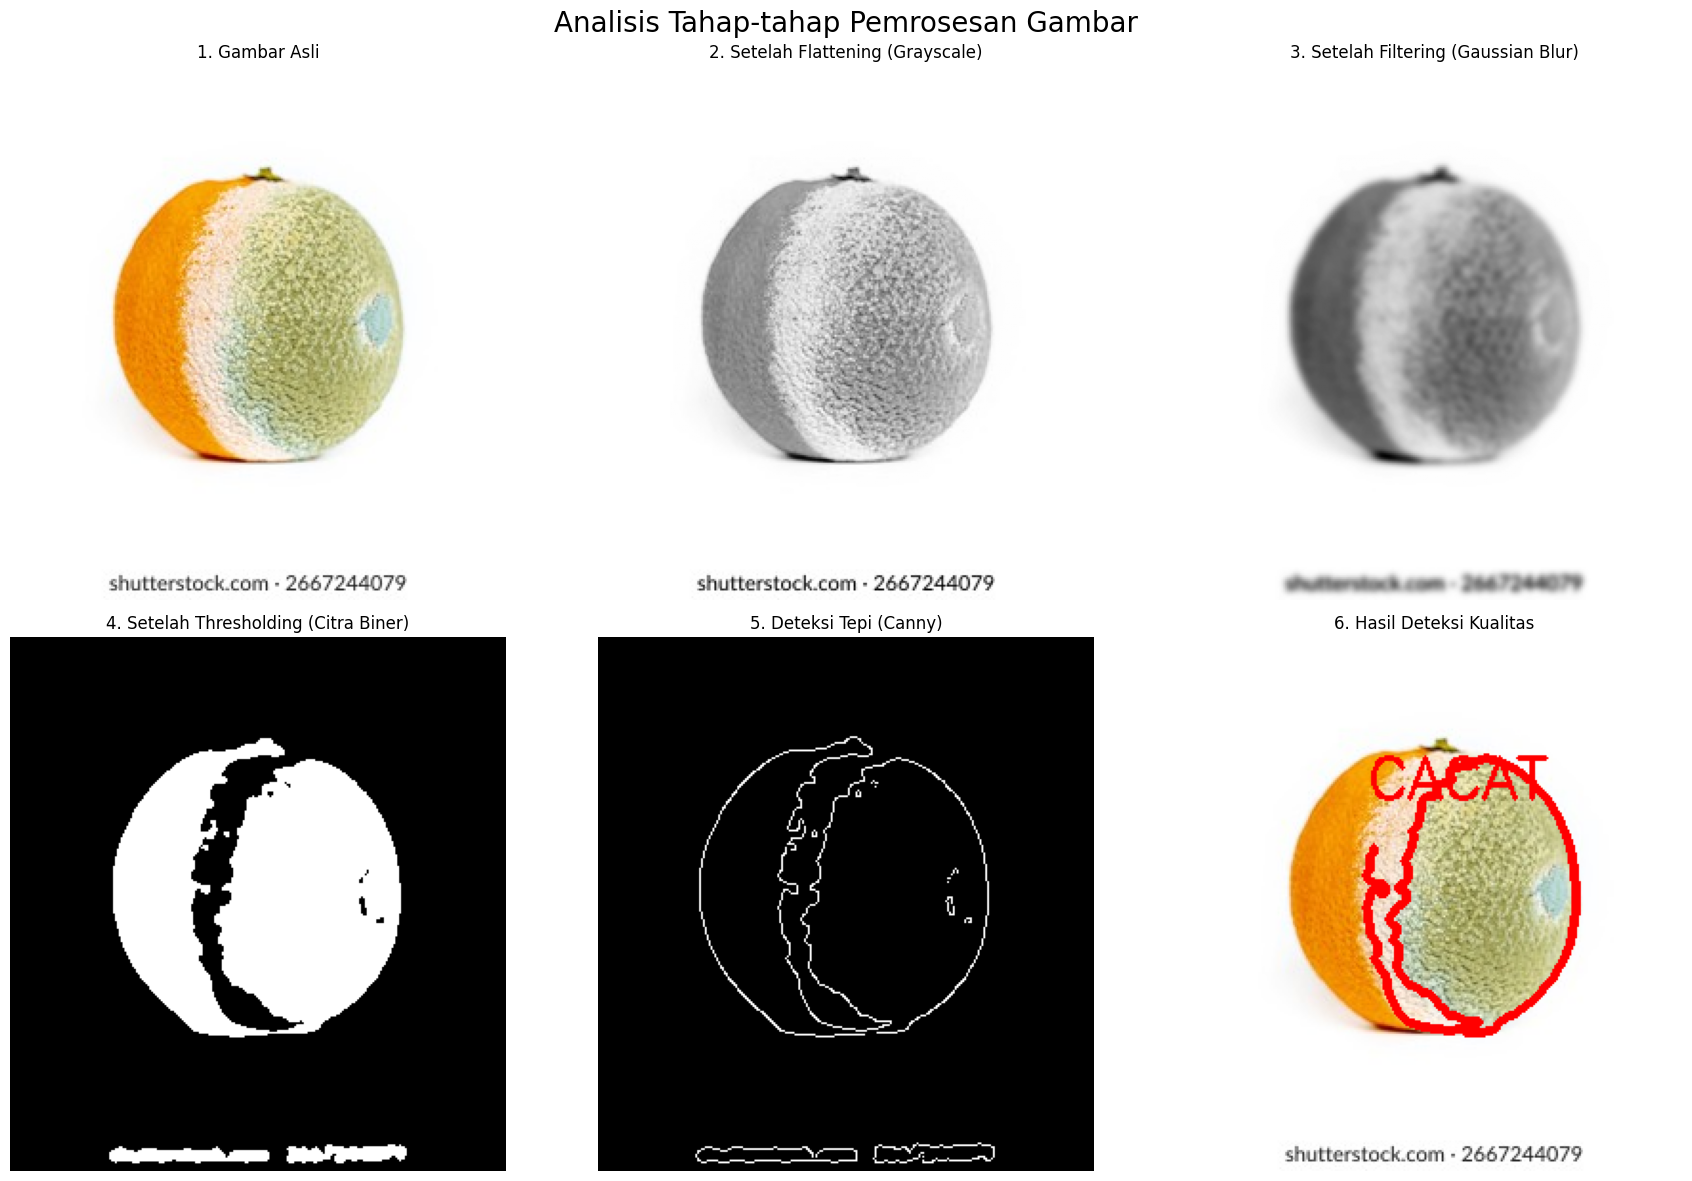


Cacat terdeteksi pada produk.


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

def process_and_analyze_image(image_url):
    """
    Mengunduh dan memproses satu gambar dari URL, menampilkan setiap tahap pemrosesan.

    Args:
        image_url (str): URL dari gambar.
    """
    try:
        # Mengunduh gambar dari URL
        req = urllib.request.urlopen(image_url)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img_bgr = cv2.imdecode(arr, -1)

        if img_bgr is None:
            print("Error: Tidak dapat mengunduh atau memproses gambar dari URL.")
            return

        # Membuat grid untuk menampilkan semua gambar
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Analisis Tahap-tahap Pemrosesan Gambar', fontsize=20)

        # Gambar Asli
        axes[0, 0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        axes[0, 0].set_title('1. Gambar Asli')
        axes[0, 0].axis('off')

        # Langkah 1: Flattening
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        axes[0, 1].imshow(img_gray, cmap='gray')
        axes[0, 1].set_title('2. Setelah Flattening (Grayscale)')
        axes[0, 1].axis('off')

        # Langkah 2: Filtering
        img_filtered = cv2.GaussianBlur(img_gray, (9, 9), 0)
        axes[0, 2].imshow(img_filtered, cmap='gray')
        axes[0, 2].set_title('3. Setelah Filtering (Gaussian Blur)')
        axes[0, 2].axis('off')

        # Langkah 3: Thresholding
        _, thresh = cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        axes[1, 0].imshow(thresh, cmap='gray')
        axes[1, 0].set_title('4. Setelah Thresholding (Citra Biner)')
        axes[1, 0].axis('off')

        # Langkah 4: Deteksi Tepi
        edges = cv2.Canny(thresh, 50, 150)
        axes[1, 1].imshow(edges, cmap='gray')
        axes[1, 1].set_title('5. Deteksi Tepi (Canny)')
        axes[1, 1].axis('off')

        # Langkah 5: Analisis Hasil
        contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        output_img = img_bgr.copy()

        if contours:
            main_contour = max(contours, key=cv2.contourArea)
            (x, y), radius = cv2.minEnclosingCircle(main_contour)
            area_main = cv2.contourArea(main_contour)
            area_circle = np.pi * (radius ** 2)

            if area_main / area_circle < 0.9:
                cv2.drawContours(output_img, [main_contour], -1, (0, 0, 255), 3)
                cv2.putText(output_img, 'CACAT', (int(x) - 50, int(y) - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            else:
                cv2.drawContours(output_img, [main_contour], -1, (0, 255, 0), 3)
                cv2.putText(output_img, 'SEMPURNA', (int(x) - 50, int(y) - 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        axes[1, 2].imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
        axes[1, 2].set_title('6. Hasil Deteksi Kualitas')
        axes[1, 2].axis('off')

        plt.tight_layout()
        plt.show()

        if area_main / area_circle < 0.9:
            print("\nCacat terdeteksi pada produk.")
        else:
            print("\nProduk tidak memiliki cacat yang terdeteksi.")

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Contoh penggunaan dengan URL gambar produk sempurna
if __name__ == "__main__":
    url_gambar = 'https://www.shutterstock.com/image-photo/rotten-orange-fruit-lies-on-260nw-2667244079.jpg'
    process_and_analyze_image(url_gambar)